# COMP8685 Deep Learning Assignment 3 (A3)

Individual (25% of total mark)

##  Task: 
You are required to develop a phyton code with additional comments to answer the question in the next section. 

##  Description: 
Create a code, in the provided template in Moodle, to train two Recurrent Neural Networks (RNNs) on the public benchmark dataset named Poker Hand available at: https://archive.ics.uci.edu/ml/datasets/Poker+Hand. 

Poker Hand dataset is composed of one training set named “poker-hand-training-true.data” and one testing set named “poker-hand-testing.data”. 
You will need to download both training and testing sets into your local disk by clicking the Data Folder link (see the image below).

In Poker Hand dataset, each data sample (row) is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". You can find more information about this dataset from: 
https://www.kaggle.com/datasets/rasvob/uci-poker-hand-dataset

The dataset should be imported in the code. An example on how to import the dataset to your code can be found from the link below:
https://www.kaggle.com/code/rasvob/uci-poker-dataset-classification

Note: This is only a template. You can add more code/text cells if necessary.

In [1]:
#importing the necessary libraries
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,GRU
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print('Imported')



2023-03-24 19:28:12.435750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-24 19:28:12.435783: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Imported


## Import the training and testing set in the cell below (10 marks)

In [2]:
#importing the training and testing sets as pandas dataframes
training_set=pd.read_csv('poker-hand-training-true.data')
testing_set=pd.read_csv('poker-hand-testing.data')

#giving the dataframes column names so I do not lose any data
training_set.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']
testing_set.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']

#defining the inputs and outputs/labels for both training and testing sets
X_train = training_set.loc[:,training_set.columns != 'Label']
X_test = testing_set.loc[:,testing_set.columns != 'Label']
Y_train = training_set['Label']
Y_test = testing_set['Label']

#putting into numpy arrays
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

#reshaping into dimensions(timestep data)
X_train = X_train.reshape(25009, 5, 2)
X_test = X_test.reshape(999999, 5, 2)
Y_train = Y_train.reshape(25009, 1)
Y_test = Y_test.reshape(999999, 1)

#onehot encoding labels
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)



## Implement the vanilla RNN in the cell below (10 marks)

In [3]:
#DEFINING THE Vanilla RNN
model=Sequential() #Container for the model

model.add(SimpleRNN(units=100, input_shape=(5,2), activation='relu'))#First RNN input layer
model.add(Dense(units=10, activation='softmax'))#output layer with 10 neurons because there are 10 classes

#compiling the model with parameters
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10300     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 11,310
Trainable params: 11,310
Non-trainable params: 0
_________________________________________________________________


2023-03-24 19:28:14.347302: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-24 19:28:14.347330: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-24 19:28:14.347345: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2023-03-24 19:28:14.347543: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train the vanilla RNN based on the training set in the cell below (5 marks)

In [4]:
history=model.fit(X_train,Y_train,epochs=40,batch_size=256) #fitting the model to the data

Epoch 1/40
98/98 [==============================] - 1s 5ms/step - loss: 0.0616 - accuracy: 0.4953
Epoch 2/40
98/98 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.5348
Epoch 3/40
98/98 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.5456
Epoch 4/40
98/98 [==============================] - 1s 5ms/step - loss: 0.0548 - accuracy: 0.5511
Epoch 5/40
98/98 [==============================] - 0s 5ms/step - loss: 0.0543 - accuracy: 0.5602
Epoch 6/40
98/98 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.5664
Epoch 7/40
98/98 [==============================] - 0s 5ms/step - loss: 0.0538 - accuracy: 0.5692
Epoch 8/40
98/98 [==============================] - 1s 5ms/step - loss: 0.0532 - accuracy: 0.5716
Epoch 9/40
98/98 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.5861
Epoch 10/40
98/98 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.5889
Epoch 11/40
98/98 [

## Evaluate the vanilla RNN based on the testing set in the cell below (5 marks)

In [5]:
loss,accuracy = model.evaluate(X_test,Y_test)# evaluate loss and accuracy scores

31250/31250 [==============================] - 39s 1ms/step - loss: 0.0375 - accuracy: 0.7425


## Present the classification accuracy and confusion matrix of the vanilla RNN in the cell below (10 marks)

THE CLASSIFICATION ACCURACY OF THE MODEL IS 0.742


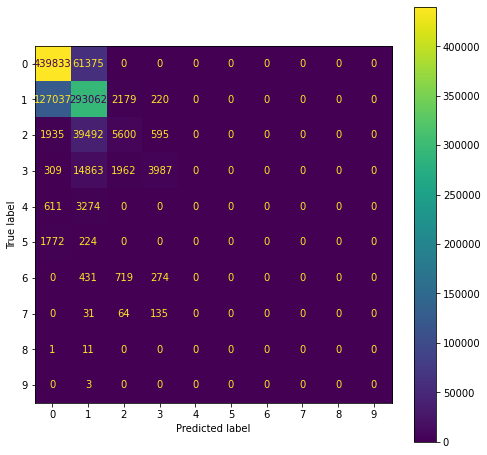

In [6]:
print(f"THE CLASSIFICATION ACCURACY OF THE MODEL IS {accuracy:.3f}")#print the classification accuracy


Y_pred = model.predict(X_test)#ask it to predict the labels

# convert predicted probabilities to predicted labels
Y_pred = np.argmax(Y_pred, axis=1)

#returns indices of the elements of Y_test
y_test = np.argmax(Y_test, axis=1)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred)

#plot the confusion matrix, define size
cm_visual = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize=(8, 8))
cm_visual.plot(ax=ax)

#show the confusion matrix
plt.show()

## Implement the second RNN based on LSTM or GRU neurons in the cell below (10 marks)

In [7]:
#DEFINING THE GRU RNN
model2=Sequential()#container for the model

model2.add(GRU(units=100, input_shape=(5,2), activation='relu'))#First RNN input layer with 100 neurons
model2.add(Dense(units=10, activation='softmax'))#output layer with 10 neurons because there are 10 classes

#compiling the model with parameters
model2.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               31200     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 32,210
Trainable params: 32,210
Non-trainable params: 0
_________________________________________________________________


## Train the second RNN based on the training set in the cell below (5 marks)

In [11]:
history=model2.fit(X_train,Y_train,epochs=40,batch_size=256) #fitting the model to the data

Epoch 1/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0362 - accuracy: 0.7521
Epoch 2/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0361 - accuracy: 0.7515
Epoch 3/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0356 - accuracy: 0.7557
Epoch 4/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0357 - accuracy: 0.7544
Epoch 5/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0356 - accuracy: 0.7544
Epoch 6/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0351 - accuracy: 0.7600
Epoch 7/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0349 - accuracy: 0.7602
Epoch 8/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0346 - accuracy: 0.7630
Epoch 9/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0345 - accuracy: 0.7640
Epoch 10/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0345 - accuracy: 0.7643
Epoch 11/

## Evaluate the second RNN based on the testing set in the cell below (5 marks)

In [12]:
loss,accuracy=model2.evaluate(X_test,Y_test) # evaluate loss and accuracy scores

31250/31250 [==============================] - 55s 2ms/step - loss: 0.0297 - accuracy: 0.8059


## Present the classification accuracy and confusion matrix of the second RNN in the cell below (10 marks)

THE CLASSIFICATION ACCURACY OF THE MODEL IS 0.806


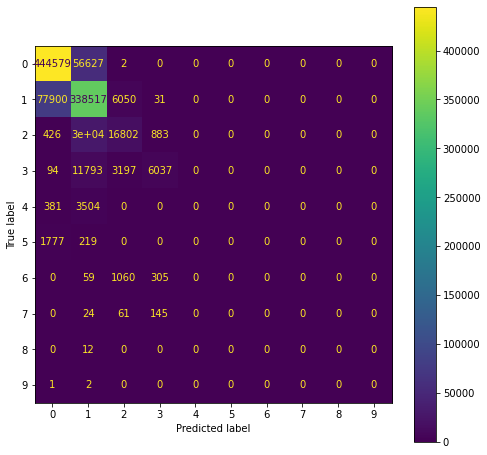

In [13]:
print(f"THE CLASSIFICATION ACCURACY OF THE MODEL IS {accuracy:.3f}")#print the classification accuracy

Y_pred = model2.predict(X_test)#asks the model to predict the labels


# convert predicted probabilities to predicted labels
Y_pred = np.argmax(Y_pred, axis=1)

#returns indices of the elements of Y_test
y_test = np.argmax(Y_test, axis=1)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred)

#plot the confusion matrix, define size
cm_visual = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize=(8, 8))
cm_visual.plot(ax=ax)

#show the confusion matrix
plt.show()

## Answer the following question in the cell below  (10 marks).

## Question:
Compare the advantages and disadvantages of the two models you have implemented and give some ideas on how to improve these results/performance further.

The simple/vanilla RNN trains in a shorter time than the GRU RNN, about half the time given that all conditions (number of neurons, number of layers, optimiser etc) are equal.
However the GRU has more parameters for the same number of neurons, and so is able to learn more representations of the data which gave it a higher accuracy.
GRU also takes care of the vanishing gradient problem much better than vanilla.
I could have improved the performance by adding an L1 regulariser which imposes a penalty on the weights.
I could have also improved the accuracy by using a categorical_crossentropy loss function which is more suited to multi-class problems.
Increasing the number of epochs would also have increased the performance.

## Additional remarks:

Code outline appropriately commented. (10 marks)

Code running without errors. (10 marks)